# Analyzing Hotel Booking Cancellations



## Business Context

As a Data Analyst of a company owning a city hotel in a metropolitan area and a resort hotel located near a coastline both within the United States, you've been assigned by your manager to provide insights on the recent rise of hotel booking cancellations in both hotels for the past few months. These events causes the management to suffer financial losses and they would like to know some leads on reasons why customers cancel their room reservations.

## Dataset

You've been given a dataset containing a list of bookings recorded in the booking system. Each row consist a booking made for a particular date and it also contains details containing the following:

| Column Name                    | Description                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| hotel                          | The type of hotel the booking was made                                      |
| lead_time                      | The time (in hours) between the booking date and the expected arrival date  |
| arrival_date_year              | The year of guest's expected arrival                                        |
| arrival_date_month             | The month of guest's expected arrival                                       |
| arrival_date_day_of_month      | The day of the month of guests's expected arrival                           |
| adults                         | Describes how many guests in the booking are adults                         |
| children                       | Describes how many guests in the booking are children                       |
| babies                         | Describes how many guests in the booking are babies                         |
| meal                           | A category that describes what type of meal ordered by the guest |
| country                        | Country of Origin (in ISO 3166 Alpha-3 code format)                         |
| is_repeated_guest              | Describes whether or not the guest have booked before                       |
| previous_cancellations         | Describes the number of previous cancellations by the guest                 |
| previous_bookings_not_canceled | Describes the number of previous non-canceled bookings by the guest         |
| reserved_room_type             | A category that describes what room type the guest reserved                 |
| assigned_room_type             | A category that describes what room type the guest received                 |
| booking_changes                | The number of changes the customer did on the booking                       |
| deposit_type                   | The type of payment deposit used by the guest                               |
| days_in_waiting_list           | Describes the number of days the guest was in the waiting list              |
| customer_type                  | Describes the type of guest in the booking                                  |
| adr                            | The potential "Average Daily Revenue" of the booking                        |
| car_parking_spaces             | The number of car parking spaces requested by the guest                     |
| special_requests               | The number of special requests given by the guest                           |
| status                         | The updated status of the booking                                           |
| status_last_update             | The date of the status registered to the booking system                     |

## Importing Python Libraries

For me to analyze the given data, we first have to import the necessary Python libraries.

### Task 1: Import the following python libraries to be used for this task



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Task 2: Load the `.csv` file into a pandas dataframe and store it in a variable named `data`.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After mounting the drive and uploading the dataset on it, I can import the given dataset.

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/HOME ASSIGNMENT/Home Assignment 5.10/drive-download-20230511T041442Z-001/hotel_bookings_data.csv')


In [ ]:

df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
0,Resort Hotel,342,2015,July,1,2,0.0,0,BB,PRT,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,737,2015,July,1,2,0.0,0,BB,PRT,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,7,2015,July,1,1,0.0,0,BB,GBR,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,13,2015,July,1,1,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,14,2015,July,1,2,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

## Data Cleaning



### Task 3: Remove all completely duplicated rows in the dataframe `data`



To start off, i can first check if there are any duplicates found in the dataset.


In [ ]:

df[df.duplicated()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
5,Resort Hotel,14,2015,July,1,2,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,72,2015,July,1,2,0.0,0,BB,PRT,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,70,2015,July,2,2,0.0,0,HB,ROU,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,5,2015,July,5,2,0.0,0,BB,PRT,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,2015,July,7,1,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,186,2017,August,31,2,0.0,0,BB,DEU,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


I found that there are around 32 thousand rows that are considered as complete duplicates.



In [ ]:

df = df.drop_duplicates()

To check, i can verify that there would only be 87300 rows left in our dataframe `data`.

In [ ]:

print(df.shape)

(87300, 24)


In [ ]:

assert(df.shape == (87300, 24))

### Task 4: Check the Columns containing Missing Values

In [ ]:

num_missing_cols = df.isna().sum().sort_values(ascending=False)

In [ ]:

print(num_missing_cols)

country                           451
children                            4
hotel                               0
reserved_room_type                  0
status                              0
special_requests                    0
car_parking_spaces                  0
adr                                 0
customer_type                       0
days_in_waiting_list                0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
previous_bookings_not_canceled      0
lead_time                           0
previous_cancellations              0
is_repeated_guest                   0
meal                                0
babies                              0
adults                              0
arrival_date_day_of_month           0
arrival_date_month                  0
arrival_date_year                   0
status_last_update                  0
dtype: int64


In [ ]:

assert(type(num_missing_cols) == pd.Series)
assert(num_missing_cols.shape == (24,))
assert(all(num_missing_cols[:3] == [451,4,0]))

i can see in our counts that both columns `country` and `children` have missing values.

### Task 5: Clean the `country` and `children` column by providing a default value



In [ ]:

df[df['country'].isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
30,Resort Hotel,118,2015,July,1,1,0.0,0,BB,NaN,...,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,7/15/2015
4127,Resort Hotel,0,2016,February,15,0,0.0,0,SC,NaN,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2/15/2016
7092,Resort Hotel,8,2016,July,21,1,0.0,0,BB,NaN,...,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,7/20/2016
7860,Resort Hotel,39,2016,August,30,2,0.0,0,HB,NaN,...,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,7/22/2016
8779,Resort Hotel,0,2016,October,13,1,0.0,0,BB,NaN,...,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,10/13/2016


In [ ]:

df[df['children'].isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
40600,City Hotel,2,2015,August,3,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/1/2015
40667,City Hotel,1,2015,August,5,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/4/2015
40679,City Hotel,1,2015,August,5,3,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,8/4/2015
41160,City Hotel,8,2015,August,13,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,8/9/2015


i can see that there are some rows have missing values indicated as `NaN`.




In [ ]:

df['country'].fillna('Other', inplace=True)

On the other hand, there are missing values in the `children` column.

In [ ]:

df['children'].fillna(0, inplace=True)

to verify the progress, i'll going to initially check them using `assert` statement.

In [ ]:

assert(all(df[['country','children']].isna().sum() == 0))

### Task 6: Clean the date-related columns by creating a column with datetime data type.

In [ ]:


cols_to_use = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month', 'status_last_update']

df[cols_to_use].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,status_last_update
0,2015,July,1,7/1/2015
1,2015,July,1,7/1/2015
2,2015,July,1,7/2/2015
3,2015,July,1,7/2/2015
4,2015,July,1,7/3/2015


In [ ]:

df[cols_to_use].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87300 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   arrival_date_year          87300 non-null  int64 
 1   arrival_date_month         87300 non-null  object
 2   arrival_date_day_of_month  87300 non-null  int64 
 3   status_last_update         87300 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


i can observe that are three columns that defines the arrival date of a particular guest.

My objective here is to first convert these columns arrival date columns to a string, and concatenate them. Afterwards, convert this concatenated column along with `status_last_update` to a `datetime` data type.

**First, convert the year and the day columns indicated as `arrival_date_year` and `arrival_date_day_of_month` respectively to a string column `str`.**

In [ ]:

df[['arrival_date_year','arrival_date_day_of_month']] = df[['arrival_date_year','arrival_date_day_of_month']].astype('str')

**After converting them to `str`, we merge the three columns into a single column named `arrival_date` following the format `YYYY-Month-DD`**

Examples: `2015-July-1`, `2017-August-30`

In [ ]:

col_arrival_dates = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
df['arrival_date'] = df[col_arrival_dates].apply( lambda x: '/'.join(x),axis=1)



In [ ]:

print(df['arrival_date'])

0            2015/July/1
1            2015/July/1
2            2015/July/1
3            2015/July/1
4            2015/July/1
               ...      
119385    2017/August/30
119386    2017/August/31
119387    2017/August/31
119388    2017/August/31
119389    2017/August/29
Name: arrival_date, Length: 87300, dtype: object


In [ ]:

assert(pd.api.types.is_string_dtype(df['arrival_date']))
assert(all(df['arrival_date'].apply(lambda x: x.count('/')) == 2))
assert(df['arrival_date'].isna().sum() == 0)
assert(df['arrival_date'].shape == (87300,))

**Next, convert the `arrival_date` and `status_last_update` column into a datetime data type using `pd.to_datetime`**

In [ ]:

df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['status_last_update'] = pd.to_datetime(df['status_last_update'])

**Finally, remove the columns listed in `col_arrival_dates` in the dataframe `data`.**

In [ ]:

col_arrival_dates = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
df.drop(col_arrival_dates, axis=1, inplace=True)


In [ ]:
assert(df.shape == (87300, 22))
assert(pd.api.types.is_datetime64_dtype(df['arrival_date']))
assert(pd.api.types.is_datetime64_dtype(df['status_last_update']))

### Task 7: Checking for Outliers



**Show the summary statistics of the column `adr` in the dataframe `data`, and store the results into a variable `adr_summary`.**

In [ ]:

adr_summary = df['adr'].describe()

In [ ]:

print(adr_summary)

count    87300.000000
mean       106.366698
std         55.023163
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64


check if we got it correctly using `assert`

In [ ]:

assert(all(adr_summary.index == pd.Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])))
assert(adr_summary.shape == (8,))

Looking at the numbers, this wouldn't depict the outliers properly. What I can do here is to show a plot instead.

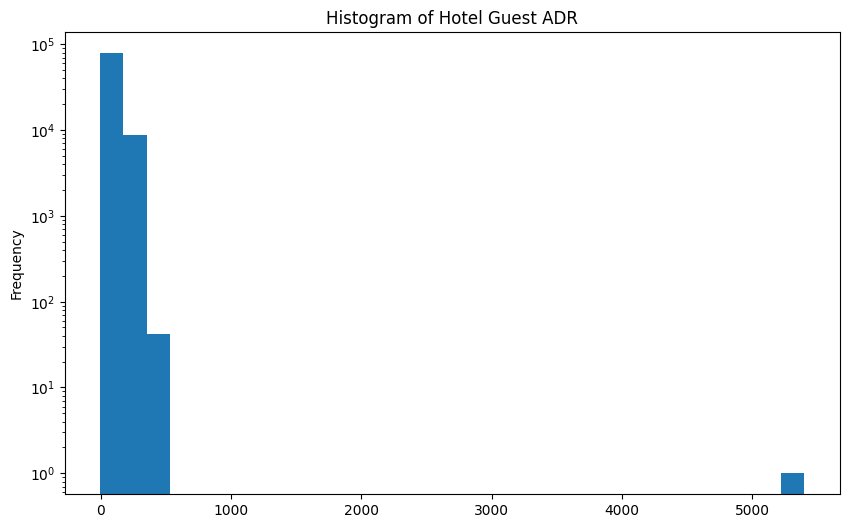

In [ ]:


fig, ax = plt.subplots(figsize=(10,6))
ax = df['adr'].plot(kind='hist', bins=30)

ax.set_title('Histogram of Hotel Guest ADR')
ax.set_yscale('log')

Looking into the results, i can see that there's a lone data point in the 5000 range, and it wouldn't make sense to have an `adr` that high, so we check on the raw data by sorting the values in `adr`



In [ ]:

df['adr'].sort_values(ascending=False)

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
           ...   
74720        0.00
74721        0.00
1230         0.00
0            0.00
14969       -6.38
Name: adr, Length: 87300, dtype: float64

i can observe that there's one data that is very high compared to the rest. Another thing is that  lowest value is a negative number, so i remove it as well in our dataset.

Remove the rows that contains an `adr` of `5400` and `-6.38`

In [ ]:

df = df[(df['adr'] != 5400) & (df['adr'] != -6.38)]


In [ ]:

df['adr'].sort_values(ascending=False)

111403    510.0
15083     508.0
103912    451.5
13142     450.0
13391     437.0
          ...  
32633       0.0
97751       0.0
83900       0.0
97752       0.0
0           0.0
Name: adr, Length: 87298, dtype: float64

To verify the progress, i would be running some `assert` statements.

In [ ]:

assert(df[df['adr'].isin([5400, -6.38])].shape == (0,22))
assert(df['adr'].min() == 0)
assert(df['adr'].max() == 510)

## Data Analysis and Insights

### Task 8: Show the amount lost from cancelled bookings



In [ ]:

amount_plotdata = df[df['status'] != 'No-Show']

Next, create a seaborn barplot that uses the data `amount_plotdata`, `x` with `'status'`, `y` with `'adr'`, and `hue` with `'deposit_type'`.

Label the chart title `Average Daily Rate of Hotel Bookings`, the x label with `Booking Status`, y label with `Average Daily Rate`, and the legend title with `Deposit Type`.

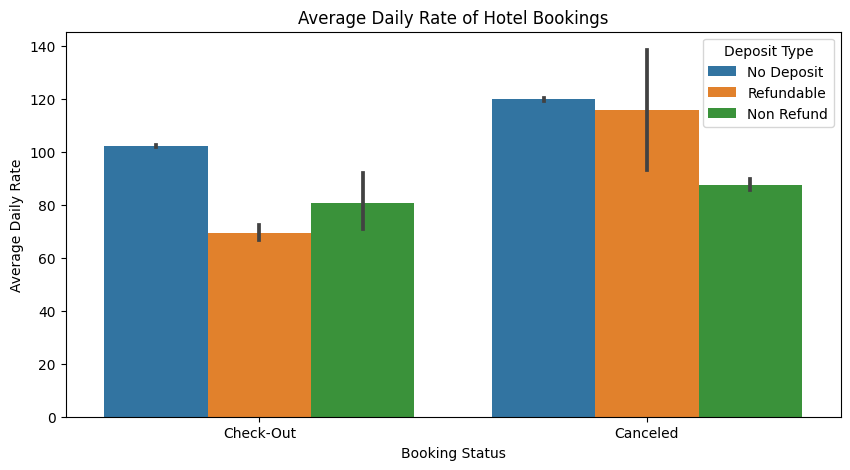

In [ ]:


fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=amount_plotdata, x='status', y='adr',
             hue='deposit_type',ax=ax)

ax.set_title('Average Daily Rate of Hotel Bookings')
ax.set_xlabel('Booking Status')
ax.set_ylabel('Average Daily Rate')
ax.legend(title='Deposit Type')

Lastly, I'll show the summary statistics using the column `adr` grouped by `status` and `deposit_type`.

In [ ]:

amount_plotdata.groupby(['status','deposit_type'])['adr'].describe()

count        mean        std   min   25%     50%  \
status    deposit_type                                                       
Canceled  No Deposit    21970.0  119.770062  52.301414   0.0  85.0  112.50   
          Non Refund      973.0   87.634111  33.255428   6.0  62.0   85.00   
          Refundable       25.0  115.838000  60.326292   8.0  76.0  108.36   
Check-Out No Deposit    63183.0  102.088206  51.415440   0.0  68.0   94.80   
          Non Refund       55.0   80.687818  38.075381   6.0  54.5   75.00   
          Refundable       81.0   69.239259  12.794604  34.0  66.0   66.00   

                           75%    max  
status    deposit_type                 
Canceled  No Deposit    147.00  450.0  
          Non Refund    106.00  330.0  
          Refundable    158.33  230.0  
Check-Out No Deposit    129.49  510.0  
          Non Refund    106.00  245.0  
          Refundable     72.00  128.0

### Task 9: Use `.groupby()` method to tally the cancellations and compute the cancellation rates per day

**Create three new columns named `arrival_day`, `arrival_month`, and `arrival_year` that uses `arrival_date` which gets the day, month, and year respectively.**

In [ ]:

df['arrival_year'] = df['arrival_date'].dt.year
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day'] = df['arrival_date'].dt.day

**Next, i create a new column named `is_canceled` that contains boolean values whether the column `status` has the value `Canceled` or not.**

In [ ]:
df['status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:

df['is_canceled'] = df['status'] == 'Canceled'

**i then use `.groupby()` method to group the given arrival columns and find the `sum` and `count` of cancelled bookings and store the results to a variable named `canceled_data`**

In [ ]:

grouping_cols = ['arrival_year','arrival_month','arrival_day']
canceled_data = df.groupby(grouping_cols)['is_canceled'].agg(['sum','count']).reset_index()



i then create a new column named `cancel_rate` that is computed by dividing the columns `sum` and `count` from the dataframe `canceled_data`

```
cancel_rate = column_of_sum / column_of_count
```

In [ ]:

df['cancel_rate'] = canceled_data['sum'] / canceled_data['count']

In [ ]:

canceled_data.head()

,arrival_year,arrival_month,arrival_day,sum,count
0,2015,7,1,11,53
1,2015,7,2,18,54
2,2015,7,3,19,51
3,2015,7,4,18,60
4,2015,7,5,14,51


### Task 10: Show a line plot of hotel booking cancellation rate

<ipython-input-44-c9547a4e696e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=canceled_data, x='arrival_month', y=df['cancel_rate'],


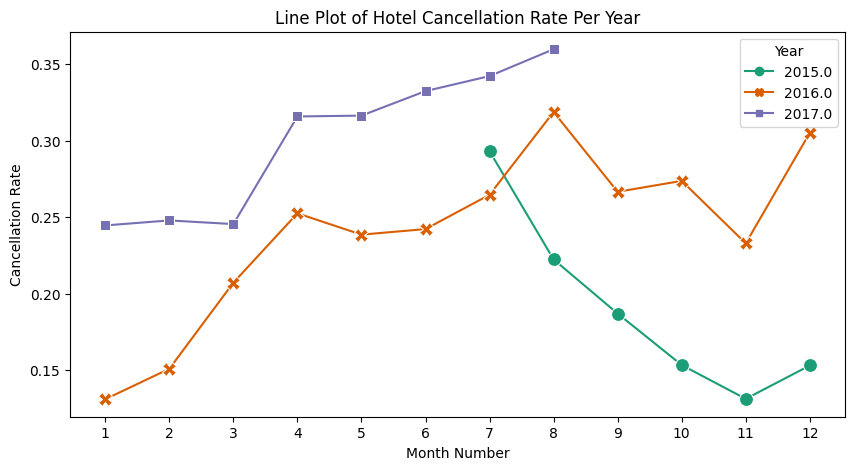

In [ ]:


fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=canceled_data, x='arrival_month', y=df['cancel_rate'],
             hue='arrival_year', style='arrival_year',
             markersize=10, palette='Dark2', ci=None,
             markers=True, dashes=False,
             ax=ax)

ax.set_xticks(range(1,13))

ax.set_title('Line Plot of Hotel Cancellation Rate Per Year')
ax.set_xlabel('Month Number')
ax.set_ylabel('Cancellation Rate')

ax.legend(title='Year')

### Task 11: Use `.groupby()` method to tally the cancellations and compute the cancellation rates per deposit type and returning guest

**i then use `.groupby()` method to group the given columns and find the `sum` and `count` of cancelled bookings and store the results to a variable named `pointplot_data`**

In [ ]:

grouping_cols = ['deposit_type','is_repeated_guest','arrival_date']
pointplot_data = df.groupby(grouping_cols)['is_canceled'].agg(['sum','count']).reset_index()

i then create a new column named `cancel_rate` that is computed by dividing the columns `sum` and `count` from the dataframe `pointplot_data`

```
cancel_rate = column_of_sum / column_of_count
```

In [ ]:

pointplot_data['cancel_rate'] = pointplot_data['sum'] / pointplot_data['count']


Then, i convert the column of `is_repeated_guest` to a data type `bool`.

In [ ]:

df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

In [ ]:

pointplot_data.head()

,deposit_type,is_repeated_guest,arrival_date,sum,count,cancel_rate
0,No Deposit,0,2015-07-01,11,52,0.211538
1,No Deposit,0,2015-07-02,15,51,0.294118
2,No Deposit,0,2015-07-03,19,51,0.372549
3,No Deposit,0,2015-07-04,17,59,0.288136
4,No Deposit,0,2015-07-05,13,50,0.260000


### Task 12: Show a Pointplot of Cancellation Rates by Deposit Type

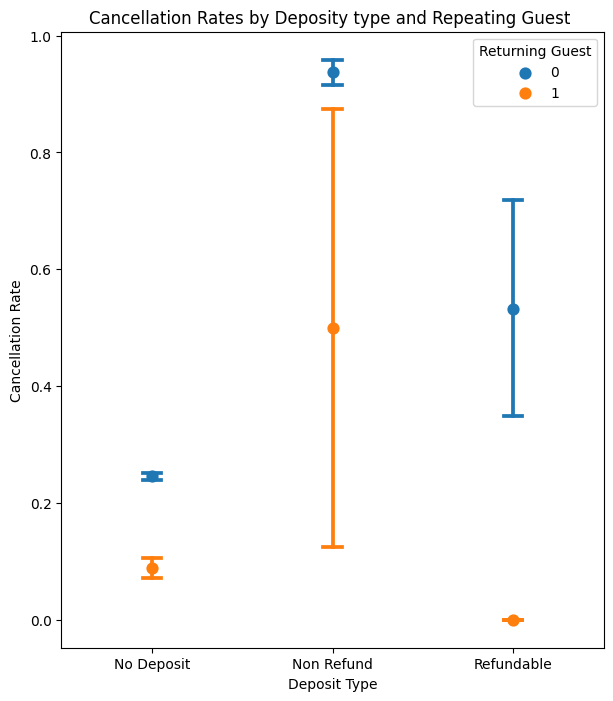

In [ ]:

fig, ax = plt.subplots(figsize=(7,8))
sns.pointplot(data=pointplot_data, x='deposit_type', y='cancel_rate',
               hue='is_repeated_guest', join=False,
               capsize=0.1, ax=ax)

ax.set_xlabel('Deposit Type')
ax.set_ylabel('Cancellation Rate')
ax.set_title('Cancellation Rates by Deposity type and Repeating Guest ')
ax.legend(title='Returning Guest')

<ipython-input-50-148a64bc437a>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=canceled_data, x='arrival_month', y=df['cancel_rate'],


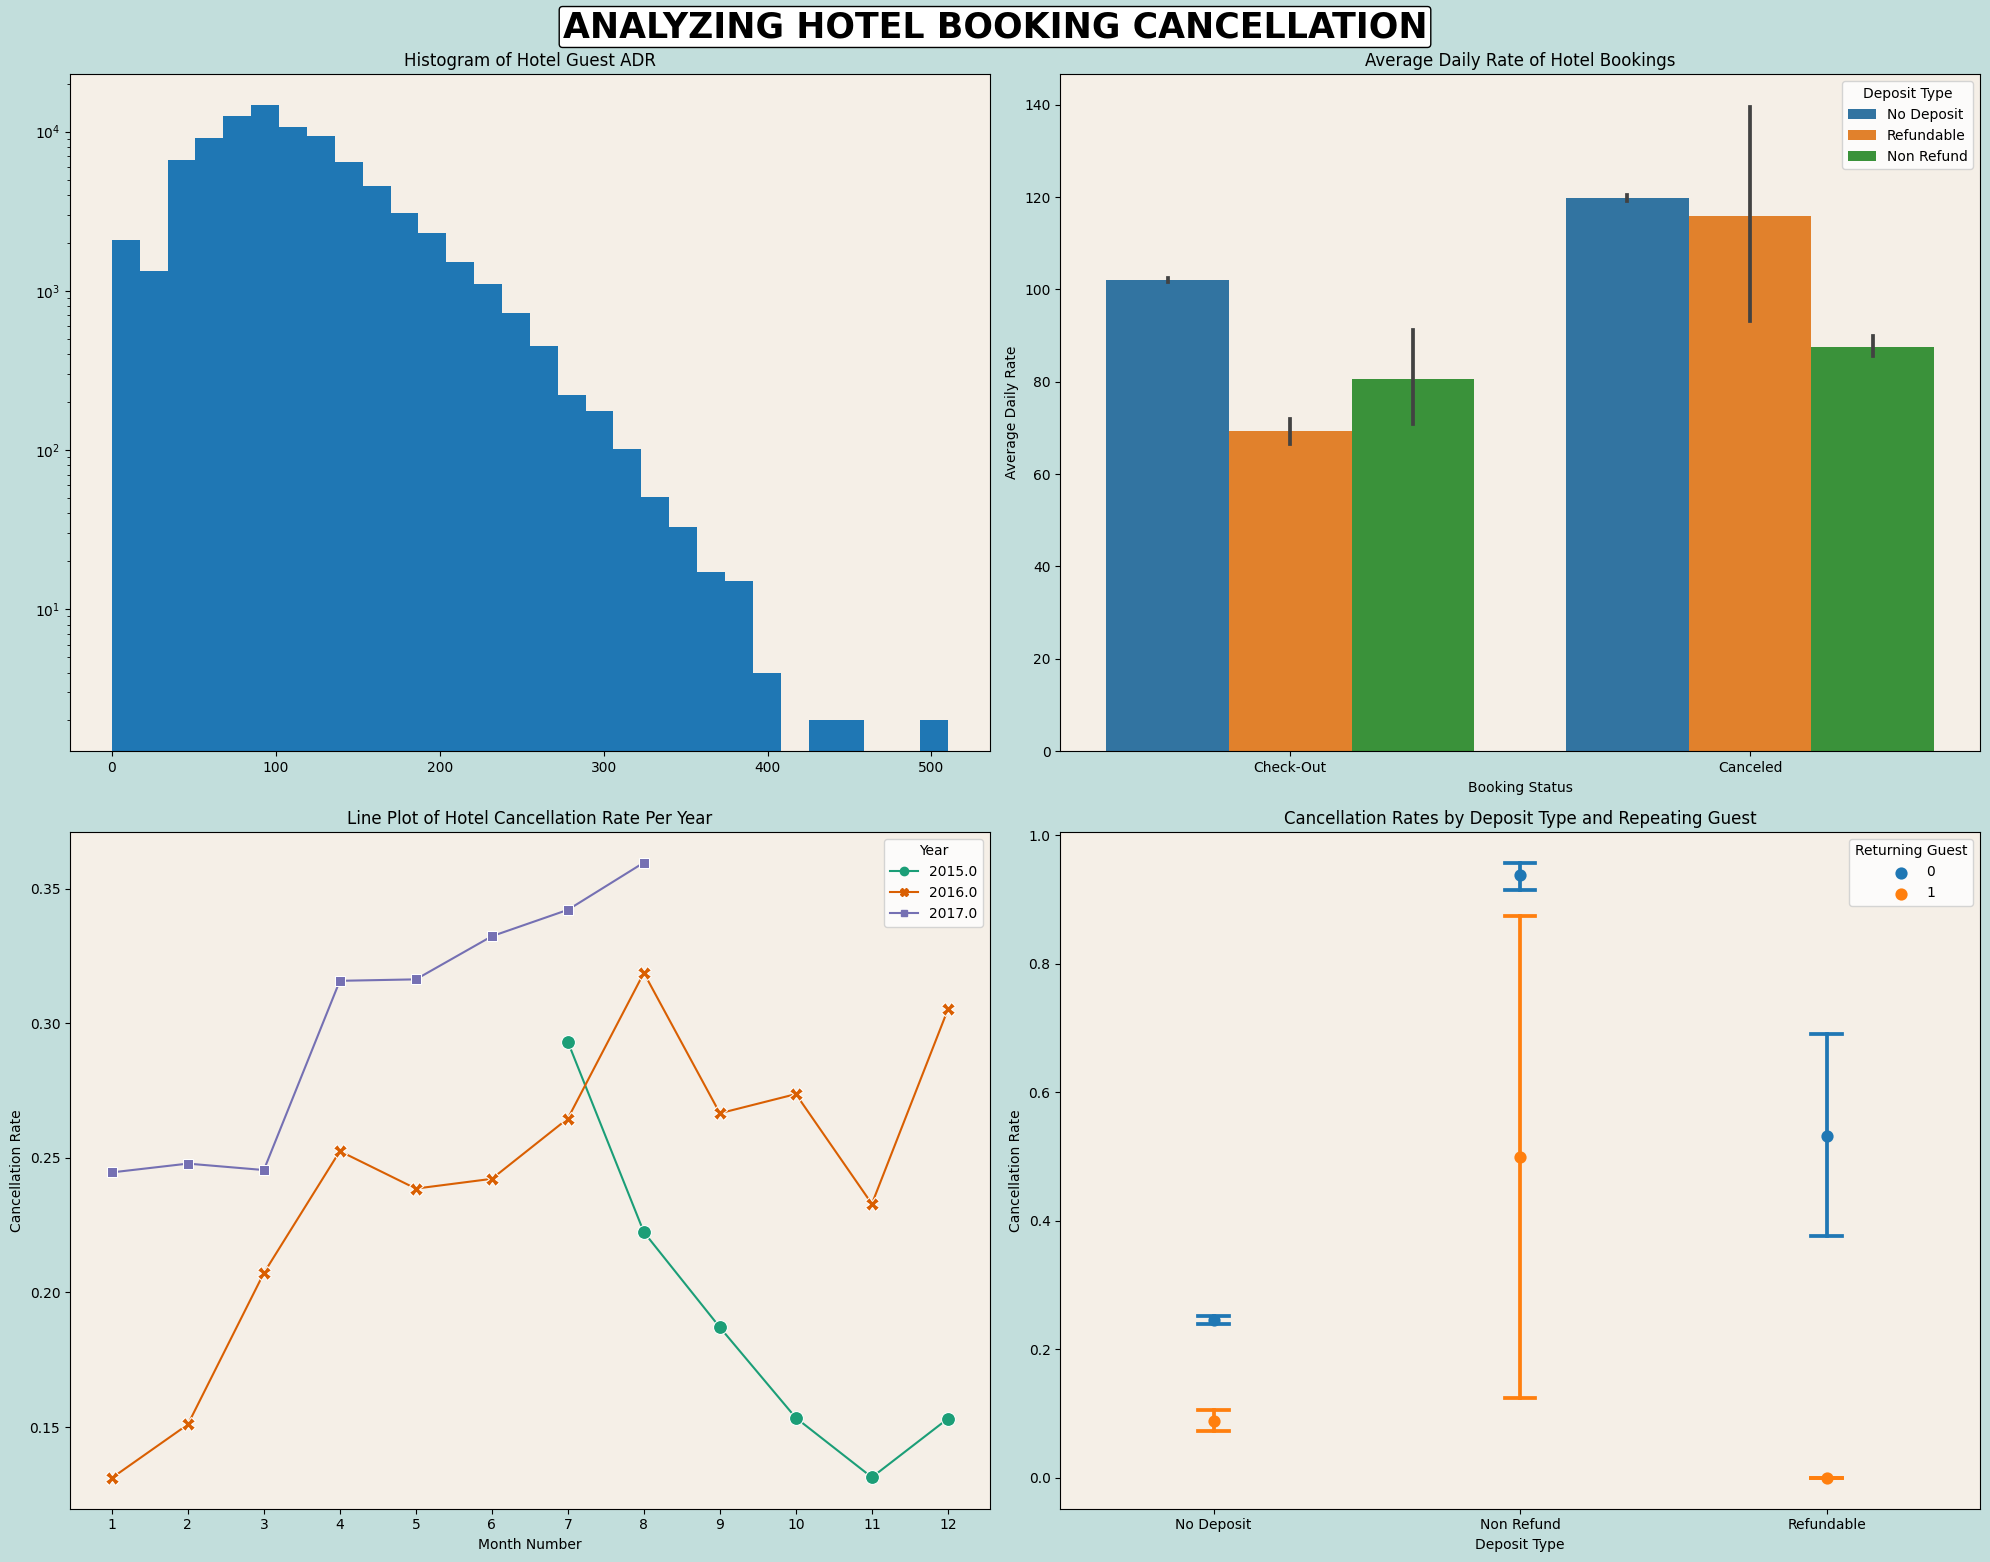

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Button

# Create the subplots for the dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

# Plot 1: Histogram of Hotel Guest ADR
ax1 = axes[0, 0]
ax1.hist(df['adr'], bins=30)
ax1.set_title('Histogram of Hotel Guest ADR')
ax1.set_yscale('log')
ax1.set_facecolor('#F5EFE7')

# Plot 2: Average Daily Rate of Hotel Bookings
ax2 = axes[0, 1]
sns.barplot(data=amount_plotdata, x='status', y='adr', hue='deposit_type', ax=ax2)
ax2.set_title('Average Daily Rate of Hotel Bookings')
ax2.set_xlabel('Booking Status')
ax2.set_ylabel('Average Daily Rate')
ax2.legend(title='Deposit Type')
ax2.set_facecolor('#F5EFE7')

# Plot 3: Line Plot of Hotel Cancellation Rate Per Year
ax3 = axes[1, 0]
sns.lineplot(data=canceled_data, x='arrival_month', y=df['cancel_rate'],
             hue='arrival_year', style='arrival_year',
             markersize=10, palette='Dark2', ci=None,
             markers=True, dashes=False,
             ax=ax3)
ax3.set_xticks(range(1, 13))
ax3.set_title('Line Plot of Hotel Cancellation Rate Per Year')
ax3.set_xlabel('Month Number')
ax3.set_ylabel('Cancellation Rate')
ax3.legend(title='Year')
ax3.set_facecolor('#F5EFE7')

# Plot 4: Cancellation Rates by Deposit Type and Repeating Guest
ax4 = axes[1, 1]
sns.pointplot(data=pointplot_data, x='deposit_type', y='cancel_rate',
              hue='is_repeated_guest', join=False,
              capsize=0.1, ax=ax4)
ax4.set_xlabel('Deposit Type')
ax4.set_ylabel('Cancellation Rate')
ax4.set_title('Cancellation Rates by Deposit Type and Repeating Guest')
ax4.legend(title='Returning Guest')
ax4.set_facecolor('#F5EFE7')

# Create the title at the top
figtext_kwargs = {'x': 0.5, 'y': 0.95, 's': 'ANALYZING HOTEL BOOKING CANCELLATION', 'fontsize': 25, 'fontweight': 'bold', 'ha': 'center',
                  'bbox': {'boxstyle': 'round', 'facecolor': 'white', 'edgecolor': 'black', 'pad': 0.1}}
fig.text(**figtext_kwargs)

# Add a background color to the entire dashboard
fig.patch.set_facecolor('#C2DEDC')

# Adjust the layout and spacing of the subplots
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Save the dashboard as a PNG image
plt.savefig('dashboard.png')

# Display the interactive dashboard
plt.show()


## Conclusions and Recommendations

We can conclude that being a repeated guest does not have a significant impact on the likelihood of a booking being canceled.

As for the recommendation:

The hotel should continue to treat all guests equally regardless of whether they are repeated or non-repeated guests.

The hotel should also focus on improving the overall booking experience for all guests, including the ease of cancellation, to reduce the likelihood of cancellations.

Additionally, the hotel can consider implementing policies or incentives to encourage guests to rebook with them in the future.



---

**END OF FILE**